In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c, v = symbols('x y z t u c v')
sp.init_printing() 

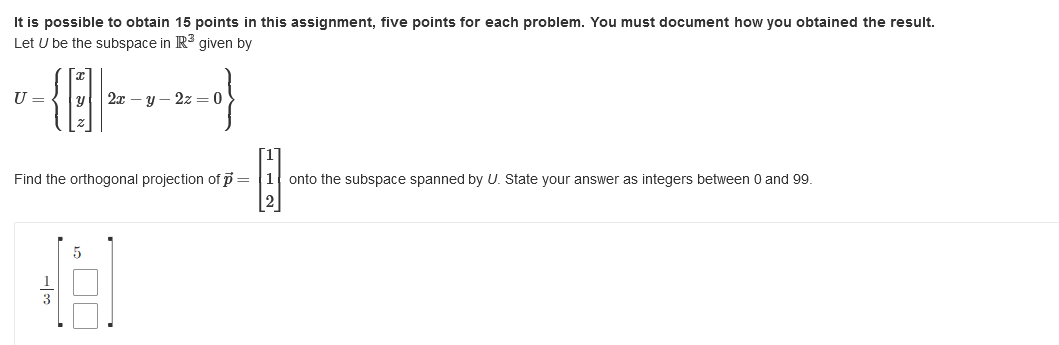

In [2]:
A = Matrix([2,-1,-2])
v1 = (A.T).nullspace()[0]
v2 = (A.T).nullspace()[1]
p = Matrix([1, 1, 2])
proj = p.project(v1) + p.project(v2)
proj = proj.normalized()
v1, v2, p



⎛⎡1/2⎤  ⎡1⎤  ⎡1⎤⎞
⎜⎢   ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢ 1 ⎥, ⎢0⎥, ⎢1⎥⎟
⎜⎢   ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣ 0 ⎦  ⎣1⎦  ⎣2⎦⎠

In [3]:
u1, u2 = GramSchmidt((2*v1, v2))
u1, u2

⎛⎡1⎤  ⎡4/5 ⎤⎞
⎜⎢ ⎥  ⎢    ⎥⎟
⎜⎢2⎥, ⎢-2/5⎥⎟
⎜⎢ ⎥  ⎢    ⎥⎟
⎝⎣0⎦  ⎣ 1  ⎦⎠

In [4]:
p.project(u1)+p.project(u2)

⎡5/3⎤
⎢   ⎥
⎢2/3⎥
⎢   ⎥
⎣4/3⎦

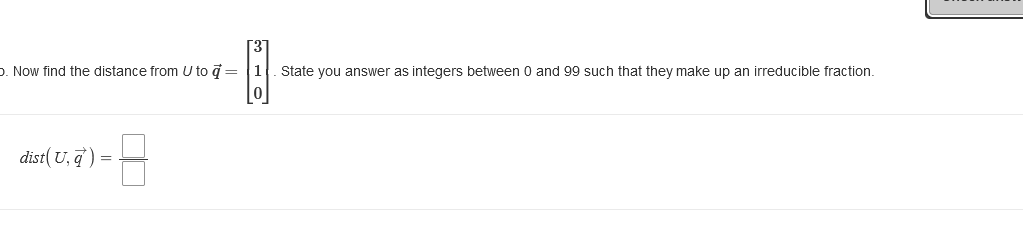

In [5]:
q = Matrix([3,1,0])
# same using projection
(q-(q.project(u1)+q.project(u2))).norm()

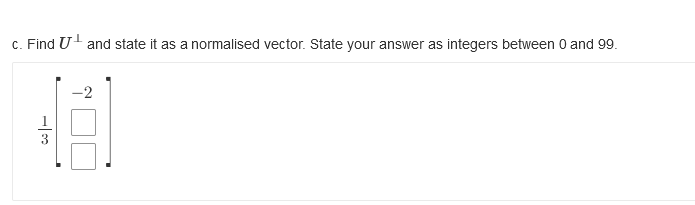

In [6]:
# c
Matrix.vstack(u1.T, u2.T).nullspace()[0].normalized() * 3

⎡-2⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣2 ⎦

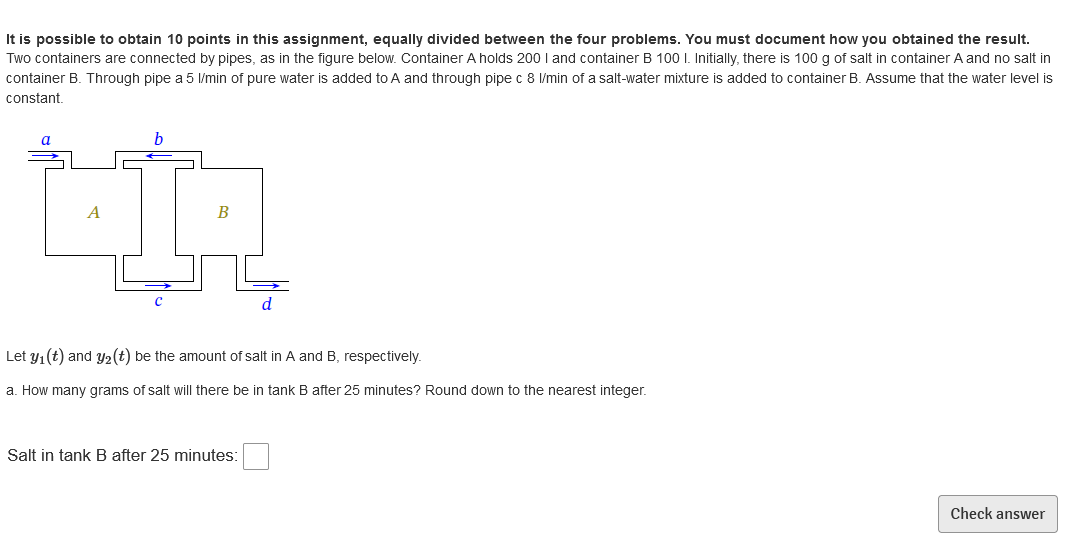

In [7]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)

eq1 = Eq(y1(t).diff(t), -(8/200)*y1(t) + (3/100)*y2(t))
eq2 = Eq(y2(t).diff(t), (8/200)*y1(t) - (8/100)*y2(t))

# Solve
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 100, y2(0): 0})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs
# Calculate results at t=25
y2_at_25 = float(y2_sol.subs(t, 25))
print(f"Salt in tank B: {round(y2_at_25)} g")


Salt in tank B: 26 g


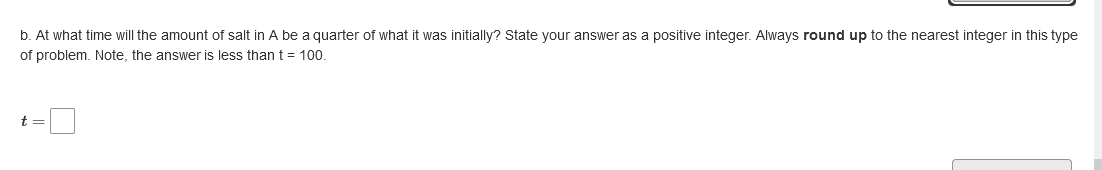

In [9]:
#B time when salt in A = 25
eq_to_solv = Eq(y1_sol, 25)
time = solve(eq_to_solv, t)
print(time)

[55.1326677015874]


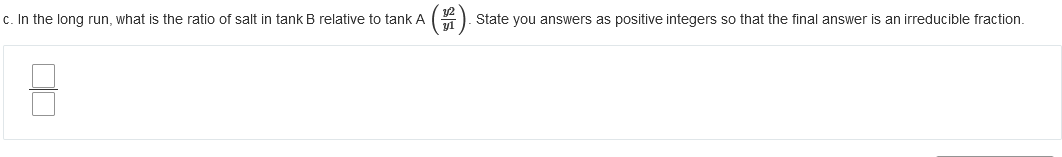

In [10]:
ratio = limit(y2_sol/y1_sol, t, oo)
print(ratio)

2/3


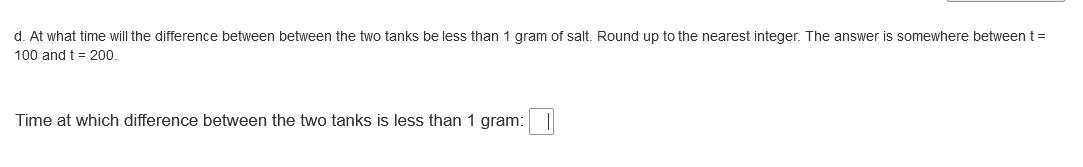

In [11]:
difference = Abs(y1_sol - y2_sol)
eq_diff = Eq(difference, 1)
time_diff = solve(eq_diff, t)
print(time_diff)

[160.944175230140]


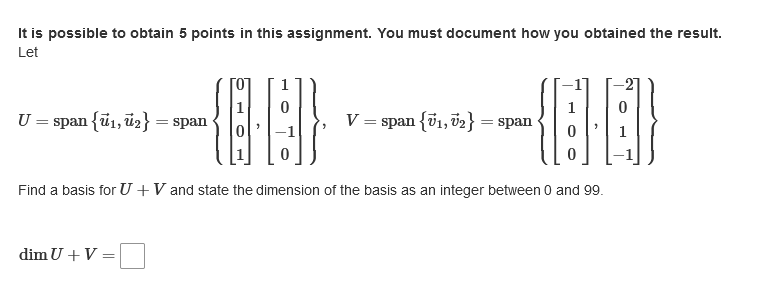

In [12]:
u1 = Matrix([0,1,-1,-2])
u2 = Matrix([1,0,1,0])
v1 = Matrix([0,-1,0,1])
v2 = Matrix([1,0,0,-1])
Matrix.hstack(v1, v2, u1, u2).rref()

⎛⎡1  0  0  -1⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  1 ⎥           ⎟
⎜⎢           ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  -1⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  0  0 ⎦           ⎠

In [ ]:
#dim u + v = 3

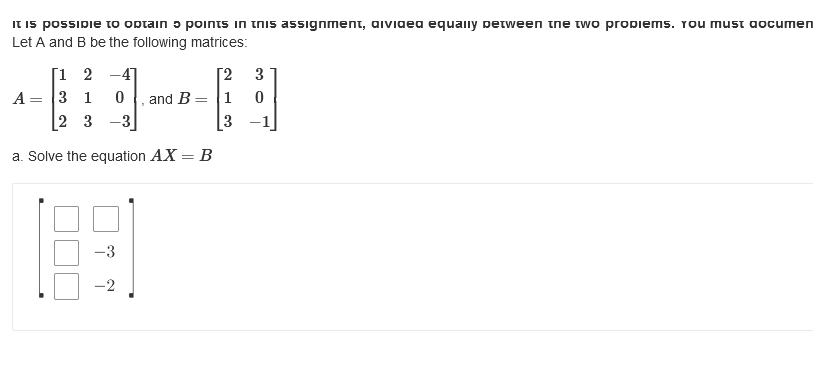

In [16]:
A = Matrix([[1,2,-4], [3,1,0], [2,3,-3]])
B = Matrix([[2,3],[1,0],[3,-1]])
x = A**-1*B
print(x)

Matrix([[0, 1], [1, -3], [0, -2]])


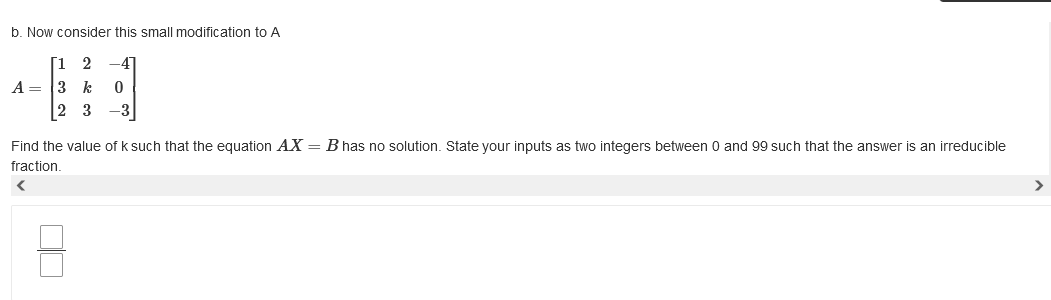

In [17]:
k = symbols('k')
A = Matrix([[1,2,-4],[3,k,0],[2,3,-3]])
B = Matrix([[2,3],[1,0],[3,-1]])
L, U, _ = A.LUdecomposition()
s = solve(U[2,2], k)
s

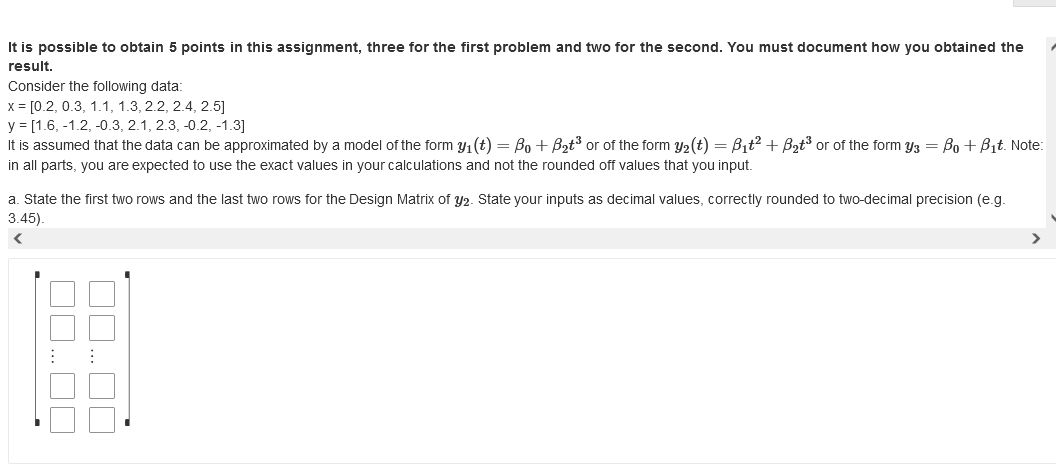

In [ ]:
# Data
x = np.array([0.2, 0.3, 1.1, 1.3, 2.2, 2.4, 2.5])
y = np.array([1.6, -1.2, -0.3, 2.1, 2.3, -0.2, -1.3])

# Design matrices for the three models
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix(x**3))  # Model 1: β0 + β1*t³
X2 = Matrix(x**2).row_join(Matrix(x**3)) # Model 2: β1*t² + β2*t³
X3 = Matrix([ones(len(x), 1)]).row_join(Matrix(x))  # Model 3: β0 + β1*t

# a)

display(Math(r'X_1 = ' + latex(X1) + r'\quad X_2 = ' + latex(X2) + r'\quad X_3 = ' + latex(X3) + r'\quad y = '
             + latex(Matrix(y))))


# Model 1: y1(t) = β0 + β1*t³
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {} + {}t^3$$".format(round(B1[0],4), round(B1[1], 4))))

# Model 2: y2(t) = β1*t² + β2*t³
X2tX2 = X2.T*X2
X2ty = X2.T*Matrix(y)
Mat, _ = X2tX2.row_join(X2ty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(t) = {}t^2 + {}t^3$$".format(round(B2[0],4), round(B2[1], 4))))

# Model 3: y3(t) = β0 + β1*t
X3tX3 = X3.T*X3
X3ty = X3.T*Matrix(y)
Mat, _ = X3tX3.row_join(X3ty).rref()
B3 = Mat[:,-1]
display(Latex("$$y_3(t) = {} + {}t$$".format(round(B3[0],4), round(B3[1], 4))))

# Calculate errors (least squares sense)
e1 = (Matrix(y) - X1*B1).norm()
e2 = (Matrix(y) - X2*B2).norm()
e3 = (Matrix(y) - X3*B3).norm()

display(Latex("$$e_1 = {}$$".format(round(e1, 4))))
display(Latex("$$e_2 = {}$$".format(round(e2, 4))))
display(Latex("$$e_3 = {}$$".format(round(e3, 4))))

# Determine best model
errors = [float(e1), float(e2), float(e3)]
best_model = errors.index(min(errors)) + 1
display(Latex("$$Best \\ model: \\ Model \\ {}$$".format(best_model)))

<IPython.core.display.Math object>

0.04
0.01
0.09
0.03
5.76
13.82
6.25
15.62


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

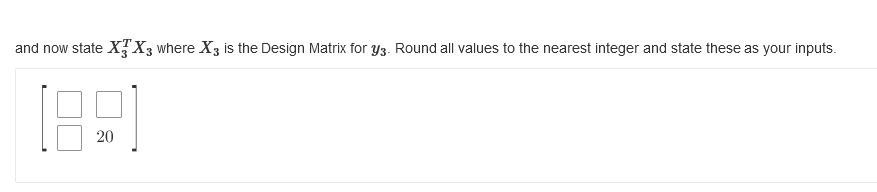

In [32]:
# b)

display(Math(r'X_3^TX_3 = ' + latex(X3tX3.evalf(5))))
display(Math(r'X_3^Ty = ' + latex(X3ty)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

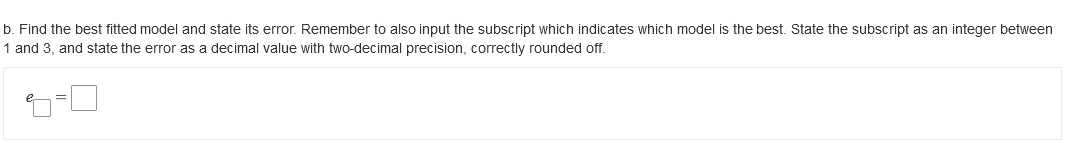

In [33]:
# Calculate errors (least squares sense)
e1 = (Matrix(y) - X1*B1).norm()
e2 = (Matrix(y) - X2*B2).norm()
e3 = (Matrix(y) - X3*B3).norm()

display(Latex("$$e_1 = {}$$".format(round(e1, 4))))
display(Latex("$$e_2 = {}$$".format(round(e2, 4))))
display(Latex("$$e_3 = {}$$".format(round(e3, 4))))

# Determine best model
errors = [float(e1), float(e2), float(e3)]
best_model = errors.index(min(errors)) + 1
display(Latex("$$Best \\ model: \\ Model \\ {}$$".format(best_model)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

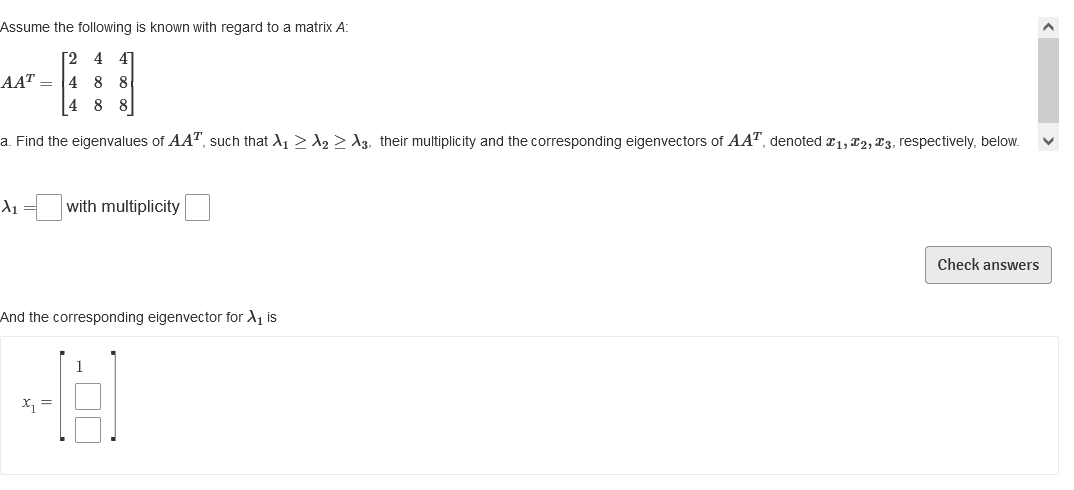

In [34]:
AAt = Matrix([[2,4,4],[4,8,8],[4,8,8]])
AAt.eigenvects()


⎡⎛      ⎡⎡-2⎤  ⎡-2⎤⎤⎞  ⎛       ⎡⎡1/2⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜       ⎢⎢   ⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢1 ⎥, ⎢0 ⎥⎥⎟, ⎜18, 1, ⎢⎢ 1 ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜       ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝       ⎣⎣ 1 ⎦⎦⎠⎦

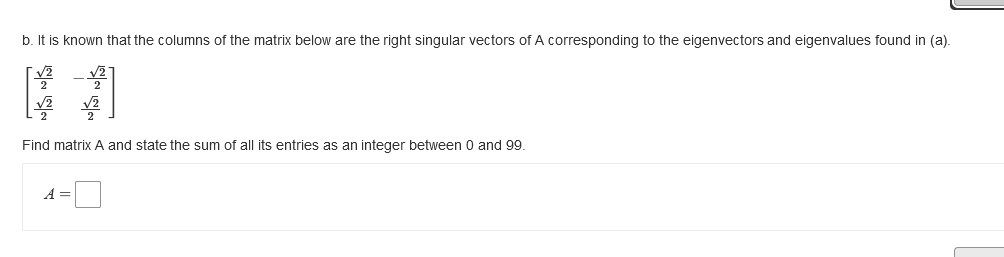

In [35]:
V = Matrix([[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]])

# From part (a): λ1 = 18, eigenvector [1,2,2]
# σ1 = sqrt(18) = 3*sqrt(2)
# u1 = [1,2,2]/3 (normalized)
u1 = Matrix([1/3, 2/3, 2/3])
v1 = Matrix([sqrt(2)/2, sqrt(2)/2])

# A = σ1 * u1 * v1^T
A = 3*sqrt(2) * u1 * v1.T

# Sum of all entries
print(round(float(sum(A).evalf())))

10
